
<a id="TMP_75c2"></a>

# <span style="color:rgb(213,80,0)">PDE Solvers</span>

pdepe solves systems of 1D PDEs that can be written in the specific form

<p style="text-align:left">
   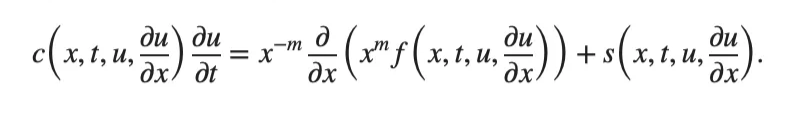
</p>


where

-  x = **spatial variable**
-  t = **time variable**
-  c = term multiplying the time derivative on LHS. Usually material properties like specific heat or capacitance.
-  f = **flux term** from Fourier's law or Fick's Law. It is related to spatial gradient du/dx
-  s =  **source term** Any generation or loss within the domain like heat source
-  m = **symmetry constant** 0\-carterisan 1\-cylndrical 2\-spherical

<a id="TMP_2654"></a>

### Problem 1 \- 1D Heat Equation

**Governing equation**

<p style="text-align:left">
   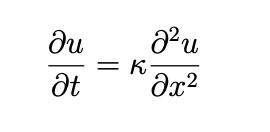
</p>


where

-  k = thermal diffusivity = 0.01
-  Let length of rod L = 1

**Initial condition**


$$u\left(x,0\right)=\sin \left(\pi x/L\right)$$

**Boundary Conditions**


Ends of rod are held at 0K


$$u\left(0,t\right)=0\;\;\;\;\;\;\;\;u\left(L,t\right)=0$$

In [1]:
clc; clearvars; close all;


First match the given PDE with the standard PDE form. This gives


c = 1


s = 0


m = 1


f = k du/dx


So we define these in a function. The function should give \[c,f,s\] as output and should be a function of u,x,t, dudx only.


In [2]:
function [c, f, s] = heatPDE(x, t, u, dudx)
    k = 0.01;
    c = 1;
    f = k * dudx;
    s = 0;
end


Then we define the initial conditions


In [3]:
function u0 = heatIC(x)
    L = 1;
    u0 = sin(pi * x / L);
end


And finally the boundary conditions. Boundary conditions are defined at the left (`xl`, `ul`) and right (`xr`, `ur`) boundaries. The boundary conditions must be written in the form:

<p style="text-align:left">
   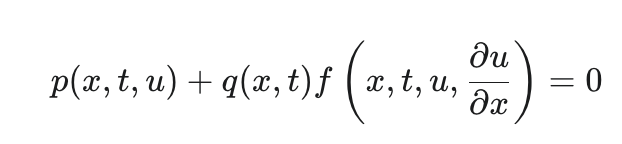
</p>


-  ul is the solution u at the left boundary xl
-  ur is the solution u at the right boundary xr

Left boundary (x=0) => u(0,t) = 0. => pl = ul\-0  *(0 because in BC, the RHS is 0)* and ql = 0, no flux term in BC


Right boundary (x=L) => u(L,t) = 0 \-> pr = ur\-0 and qr = 0, no flux term in BC


In [4]:
function [pl, ql, pr, qr] = heatBC(xl, ul, xr, ur, t)
    pl = ul - 0;
    ql = 0;
    pr = ur - 0;
    qr = 0;
end


Now finally write the main script that defines the mesh and time span, and then calls the solver.


In [5]:
m = 0;
L = 1;
xmesh = linspace(0, L, 100);  % Spatial grid with 100 points
tspan = linspace(0, 50, 25);  % Time vector from t=0 to t=50

sol = pdepe(m, @heatPDE, @heatIC, @heatBC, xmesh, tspan);


And finally plot the results


sol is a 3D array where sol(time, space, variable(u))



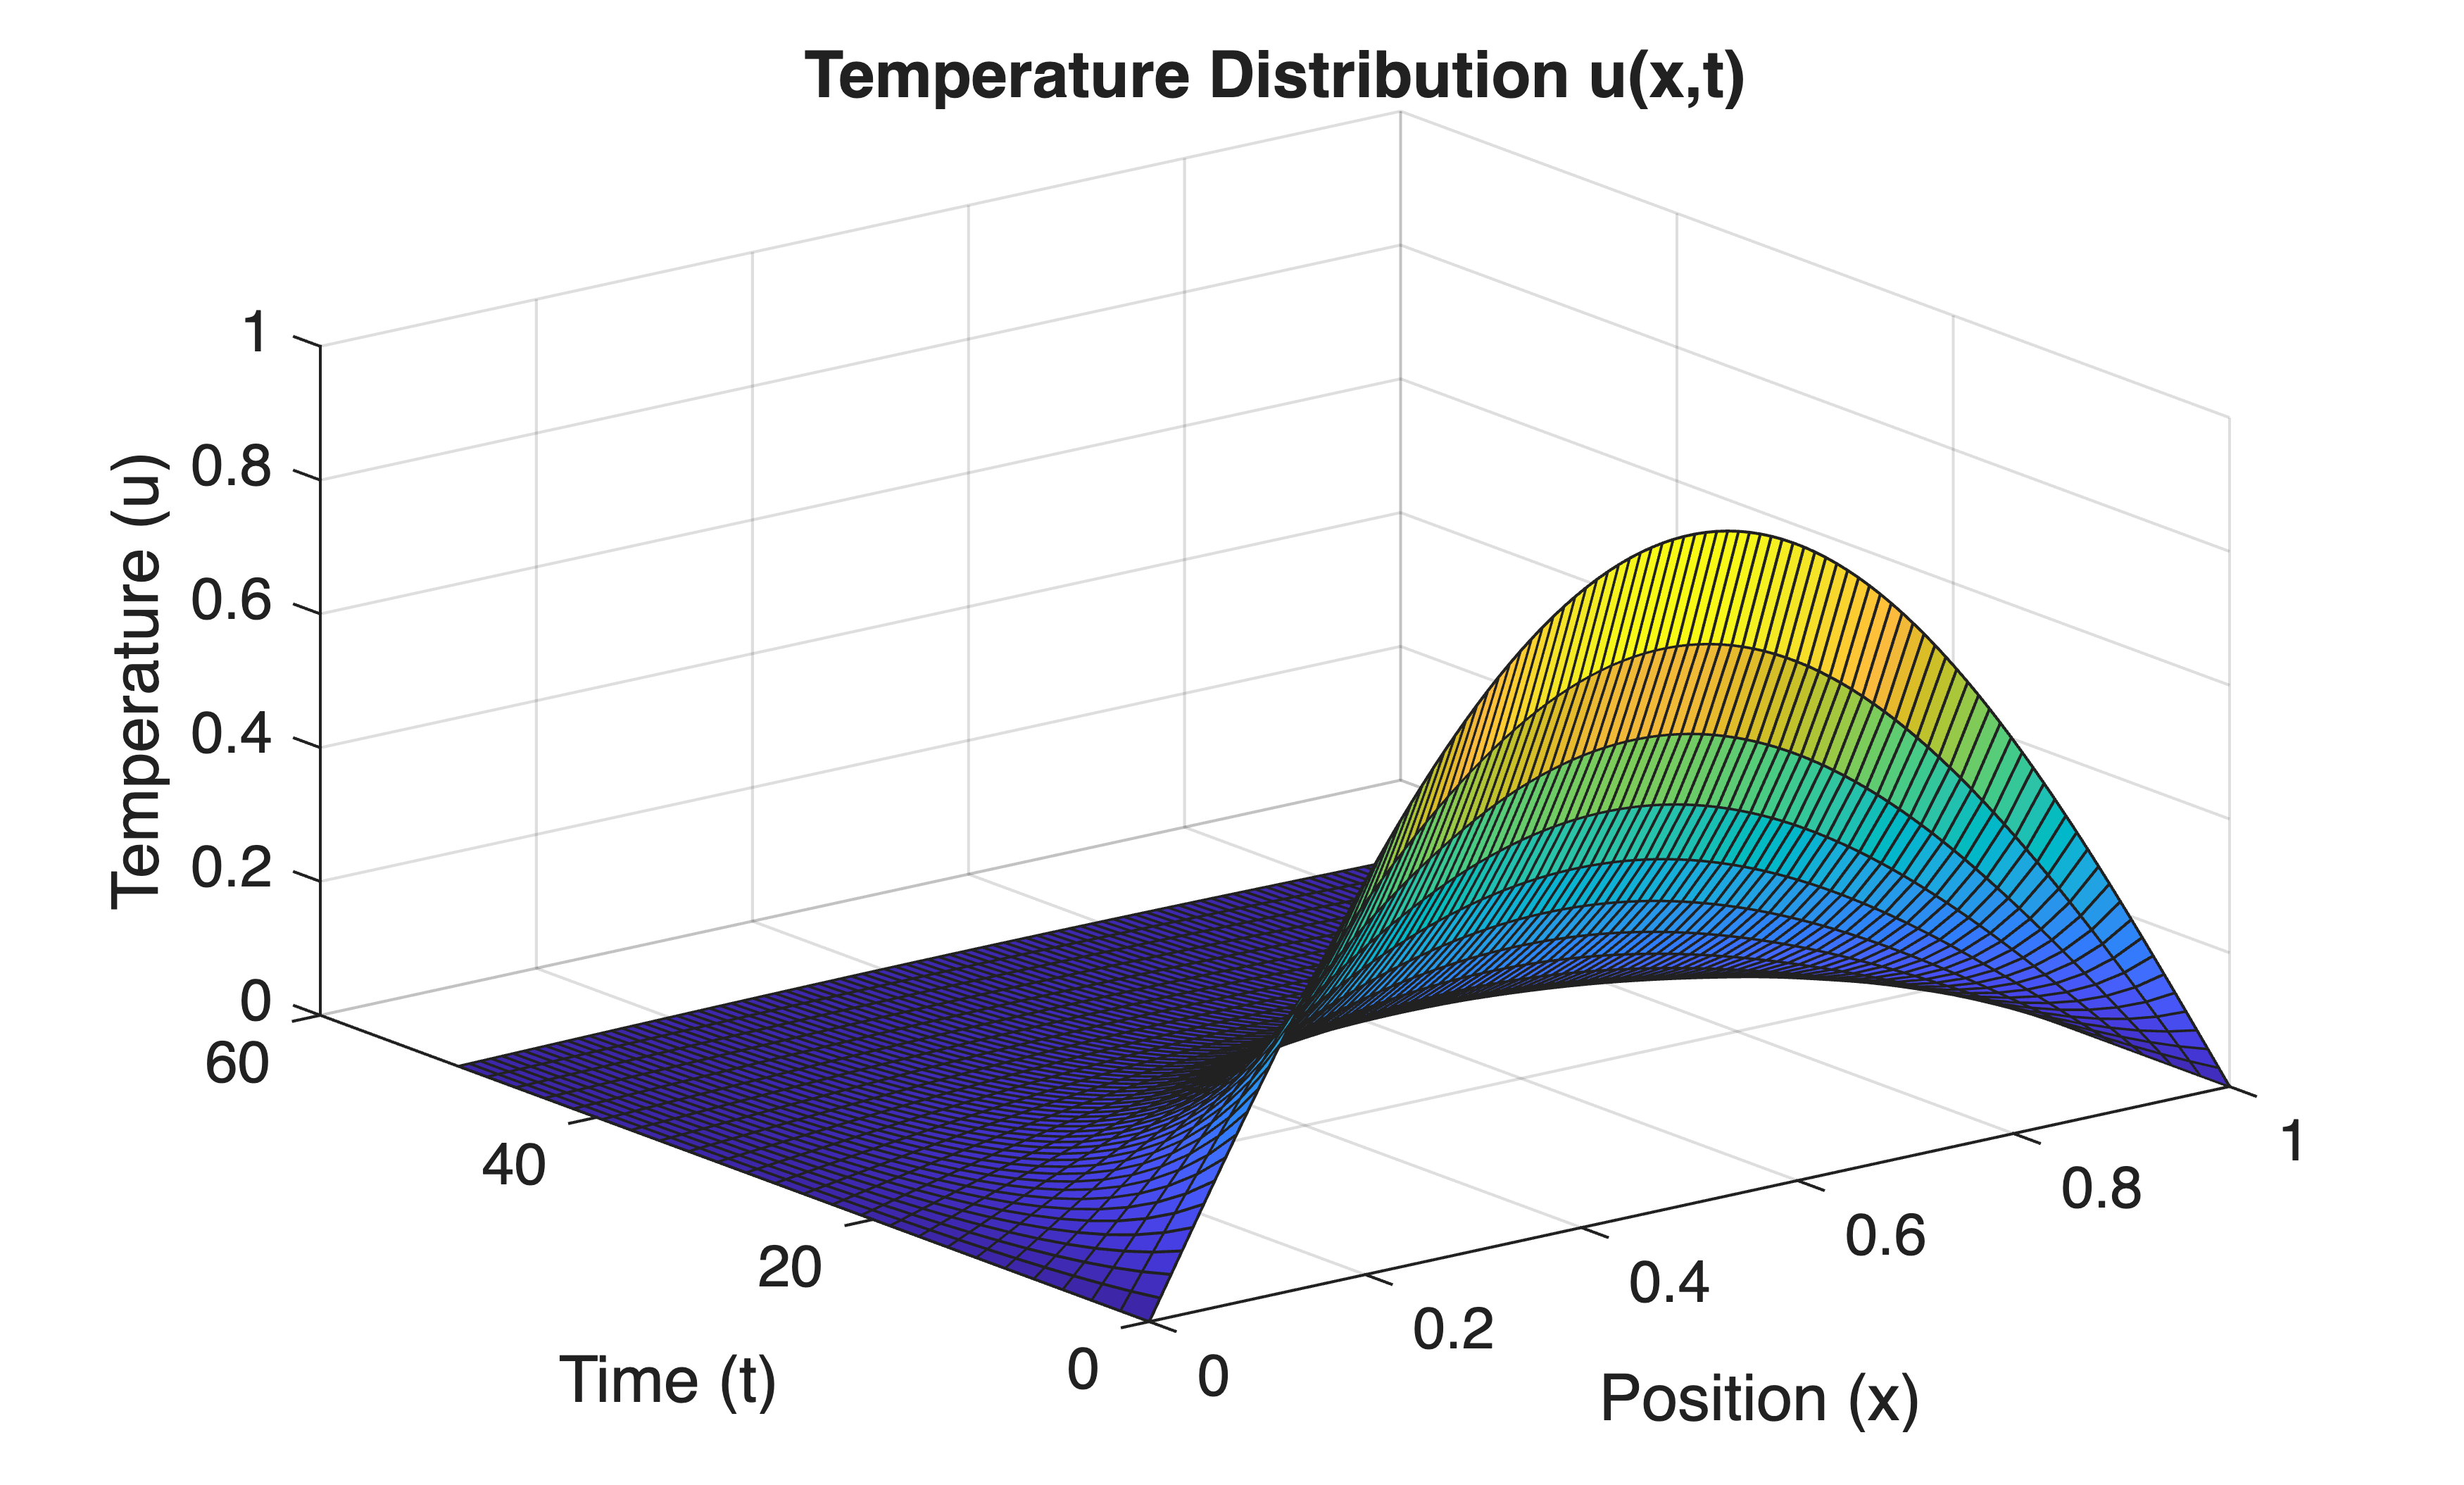

In [6]:
u = sol(:, :, 1); % Extract the first solution variable (we only have one)

% Surface plot of temperature over time and space
figure;
surf(xmesh, tspan, u);
title('Temperature Distribution u(x,t)');
xlabel('Position (x)');
ylabel('Time (t)');
zlabel('Temperature (u)');